# Game Theory - Cournot competition

In this project we will investigate in the Cournot competition model to see how firms compete on quantities. With an numerical approach, the main objective of the project is to find optimal values given the firms structure and the demand. The baseline model will include a simple demand function and a cost function for the firms which will later be used to look for the best responses. The extended model will look into how a collusion will occur when the two firms in a duopoly market end up with collaborating on quantities. Further we will look into trigger and tit-for-tat strategies known from the microeconomics III course (Game Theory) and see how this will affect profits and quantities in the economy.

In [47]:
#Imports 
from modelproject import *
from scipy import optimize, arange #importing optimize and arange
from numpy import array #importing array
from types import SimpleNamespace
from tabulate import tabulate
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plt for plotting in matplotlib
import seaborn as sns
import sympy as sm
plt.style.use('seaborn-whitegrid')
!pip install tabulate

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Demand and cost function
We start by defining the demand function for firm $i,j$ as:

$$\begin{equation} p_{i,j}(x_i, x_j) = 120-(x_i + x_j) \end{equation}$$

,where $x_i$ is the product produced by firm 1 and $x_j$ is the product produced by firm 2. The products are homogenous. 

The cost function is defined as:

$$\begin{equation} c(x) = 30x \end{equation}$$

,where $x$ is the cost for firm 1 or firm 2 since they are symmetrical. We assume constant marginal costs.

## Profits function
The profits for firm $i$ will be (since the firms are symmetrical we can assume the same profit function for firm $j$):
$$\begin{equation} \pi_i(x_i, x_j)= p_i(x_i,x_j)x_i - c(x) \end{equation}$$
, if we insert the demand and cost function:
$$\begin{equation}  \pi_i(x_i, x_j) = (120-(x_i+x_j)*x_i) - cx  \end{equation}$$
The total profits in the economy with the two firms will be:
$$\begin{equation}  \Pi_{total}(x_i, x_j) = \pi_i(x_i, x_j) + \pi_j(x_i, x_j)  \end{equation}$$

## Reaction functions

If we take the derivative of the profits function (firm $i$) with respect to $x_i$ (holding $x_j$ constant) and setting the derivative equal to zero we obtain:

$$\begin{equation} br_i(x_j) = (90-x_j)/2 \end{equation}$$

, thus the best response for firm $i$ is given by the above equation.

Similarily, the best response for firm $j$ will be 


$$\begin{equation} br_j(x_i) = (90-x_i)/2 \end{equation}$$



## Baseline model (Analytical approach with SymPy)

We will start by writing up the variables used in the Cournot-competition model and then solve it symbolically

In [34]:
#Defining the symbols
x_i = sm.symbols('x_i') #firm i quantity produced
x_j = sm.symbols('x_j') #firm j quantity produced
pi_i = sm.symbols('pi_i') #Profits
c = sm.symbols('c') #Costs

In [35]:
# 2. Defining equations as variables 
profit_i = (120-(x_i+x_j))*x_i-30*x_i #profits for firm i
profit_j = (120-(x_i+x_j))*x_j-30*x_j #profits for firm j

# 3. Differentiating firm profits 
foc_i = sm.diff(profit_i,x_i) #differentiating profit function for firm i wrt. x_i holding x_j constant
foc_j = sm.diff(profit_j,x_j) #differentiating profit function for firm j wrt. x_j holding x_i constant

print('FOC for firm i:'), display(foc_i)
print('FOC for firm j:'), display(foc_j)

# 4. Setting foc_i and foc_j equal to 0 to find the optimal profits for firm i and j
max_i = sm.Eq(foc_i,0)
max_j = sm.Eq(foc_j,0)

print('Optimal profits for firm i:'),display(max_i)
print('Optimal profits for firm j:'),display(max_j)

# 5. Solving the optimal quantity to produce for each firm by substituting one equation into other
insert = max_i.subs(x_j,x_i)
print('Substituting x_j with x_i gives:'),display(insert)

# 6. solving the above equation for x_i. Since the firms have symmetrical profit and cost function, the result apply to firm j as well
opt_q = sm.solve(insert,x_i)

print('Thus the optimal quantity to produce for firm i (and j) is:'), display(opt_q)


FOC for firm i:


-2*x_i - x_j + 90

FOC for firm j:


-x_i - 2*x_j + 90

Optimal profits for firm i:


Eq(-2*x_i - x_j + 90, 0)

Optimal profits for firm j:


Eq(-x_i - 2*x_j + 90, 0)

Substituting x_j with x_i gives:


Eq(90 - 3*x_i, 0)

Thus the optimal quantity to produce for firm i (and j) is:


[30]

(None, None)

## Baseline model (Numerical approach)

With the analytical results we can now look for if the same results will occur with a numerical approach

We will give x_0 a initial guess, and look for an optimal production for firm $i$ given the demand in the economy and the cost function the firm have:

In [37]:
x0 = [40, 40] #Initial guess
best_response_i = optimize.fsolve(vector_best_response, x0) #Optimize

print(f'The numerical solution for the best response is: {best_response_i[0]:.2f} which is the same value as found in the analytical solution') 


The numerical solution for the best response is: 30.00 which is the same value as found in the analytical solution


The optimal production is 30 for firm $i$ and this will give the following profit:

In [38]:
print(f'The profit for firm i is = {profit(best_response_i[0],best_response_i[1]):.2f}')

The profit for firm i is = 900.00


In [39]:
data = [["Nash Equilibrium", best_response_i[0], best_response_i[1], 900]]
col_names = [" ", "Firm i's optimal goods", "Firm j's optimal goods", "Profit in Nash"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════╤══════════════════════════╤══════════════════════════╤══════════════════╕
│                  │   Firm i's optimal goods │   Firm j's optimal goods │   Profit in Nash │
╞══════════════════╪══════════════════════════╪══════════════════════════╪══════════════════╡
│ Nash Equilibrium │                       30 │                       30 │              900 │
╘══════════════════╧══════════════════════════╧══════════════════════════╧══════════════════╛


Thus, we can now continue to the more interesting part with collusion.

## Extension 1 - Collusion (analytical approach)

In this part of the project, we are interested in how the firms in the economy will react if a collusion occurs between them. Overall, the theory underlines that when collusions occur between firms in duopoly economies, the profits will tend to be higher (for both firms) than under competition which makes intuitvely good sense. We will try to verify this with the following code.

In [40]:
#from earlier we have defined profits as:
print('Optimal profits for firm i from earlier:'), display(profit_i)

#when the companies collude we can substitute their index with eachother:
profit_col=profit_i.subs(x_j,x_i)
print('substituting x_j with x_i since firms now collude:'), display(profit_col)

#we then want to find the optimal quantity to produce for the colluded firm
opt_q_col=sm.diff(profit_col,x_i) #differentiating for x_i
print('Finding the new optimal quantity from collusion:'), display(opt_q_col)

#setting the equation equal to 0 and solving for x_i
opt_q_collusion = sm.solve(opt_q_col,x_i)[0]
print('Setting equal to zero to end with optimal quantity:'), display(opt_q_collusion)

#inserting the optimal quantity into the profits function:
pi_col = profit_col.subs(x_i,opt_q_collusion)

print('Profit as result of collusion between firm i and j in the economy:'),display(pi_col)

Optimal profits for firm i from earlier:


x_i*(-x_i - x_j + 120) - 30*x_i

substituting x_j with x_i since firms now collude:


x_i*(120 - 2*x_i) - 30*x_i

Finding the new optimal quantity from collusion:


90 - 4*x_i

Setting equal to zero to end with optimal quantity:


45/2

Profit as result of collusion between firm i and j in the economy:


2025/2

(None, None)

## Extension 1 - Collusion (Numerical approach)

With the analytical results we can now look for if the same results will occur with a numerical approach

In [52]:
res_col = optimize.minimize_scalar(negative_profit_collusion)
optimum_q_col = res_col.x
profits_col = profit(opt_q_collusion,opt_q_collusion)

print('The optimal profit occurs when the two companies collude and produce', "%.2f" % opt_q_collusion, 'units and gaining', "%.2f" % profits_col, 'as profits')

The optimal profit occurs when the two companies collude and produce 22.50 units and gaining 1012.50 as profits


The numerical results matches the analytical results.

## Plotting the results under collusion

We will give x_grid a initial guess, and look for an optimal production for the firms under collusion given the demand in the economy and the new cost function:

In [54]:
x_grid = np.linspace(10, 45, 1000)
xvalue = []
profits = []

for x in x_grid:
    profit(x,x)
    xvalue.append(x)
    profits.append(profit(x,x))

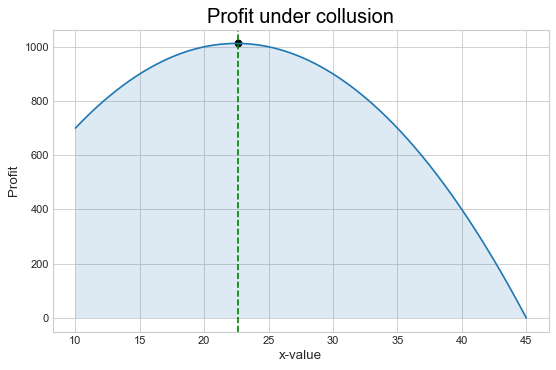

In [55]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue,profits)
ax.set_xlabel('x-value', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Profit under collusion', color='black', fontsize=18)
ax.axvline(x=22.63, color='green',linestyle = 'dashed')
ax.scatter(22.63,1012.47, color='black')
ax.fill_between(xvalue,profits, alpha=0.15)


In [56]:
optimum_profit = max(profits)
optimum_quantity = xvalue[profits.index(max(profits))]

print('The optimal profit occurs when the two companies collude and produce', "%.2f" % optimum_quantity, 'units and gaining', "%.2f" % optimum_profit, 'as profits')

The optimal profit occurs when the two companies collude and produce 22.51 units and gaining 1012.50 as profits


## Extension 2 - Deviation from collusion

In this extension we are interested in the dynamics when firm i or j deviates from the collusion strategy. This can be interesting to look for to see if there is anything for firm i to gain deviating from this strategy.

In [57]:
x_grid_deviate = np.linspace(10, 60, 100) #Make a new grid for the x values when deviation occurs
xvalue_deviate = [] ##empty list that will be filled out with the x_value  that the x-grid decides for quantities under deviation
profits_deviate = [] #Empty list that will be filled out with the profit for a certain x_value (quantity) under deviation

for x in x_grid_deviate:
    xvalue_deviate.append(x)
    profits_deviate.append(profit(x,optimum_quantity))

In [58]:
opt_profit_deviate = max(profits_deviate)
opt_quantity_deviate = xvalue_deviate[profits_deviate.index(max(profits_deviate))]

print('The optimal profit when firm i chooses to deviate from collution is', "%.2f" % opt_profit_deviate, 'and the quantity to produce will be optimal at', "%.2f" % opt_quantity_deviate, '')

The optimal profit when firm i chooses to deviate from collution is 1138.81 and the quantity to produce will be optimal at 33.74 


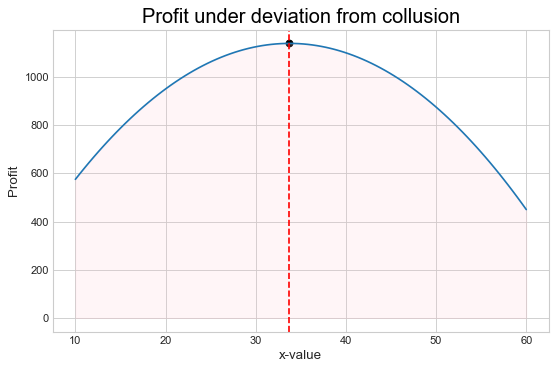

In [59]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue_deviate,profits_deviate)
ax.set_xlabel('x-value', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Profit under deviation from collusion', fontsize=18, color='black')
ax.axvline(x=opt_quantity_deviate, color='red',linestyle = 'dashed')
ax.scatter(opt_quantity_deviate,opt_profit_deviate, color='black')
ax.fill_between(xvalue_deviate,profits_deviate, color='pink', alpha=0.15)

In [63]:
#Comparing the results between collude and deviation
profit_collude = optimum_profit+optimum_profit
profit_deviate = opt_profit_deviate + profit(optimum_quantity, opt_quantity_deviate) #since firm i chooses to deviate this must mean that firm j can only get

print('Profit under collution',"%.2f" % profit_collude, 'and under deviation from collution ' "%.2f" % profit_deviate)

Profit under collution 2025.00 and under deviation from collution 1898.55


These above two values are the profit of firm i when it follows the collude strategy and when it decides to deviate from it. Since the first profit value is higher than the second one it’s advantageous not to deviate.

## Simulation - Trigger strategy

The trigger strategy is a strategy that is used in the cournot problem. Basically, the two firms decide together that they are going til use the collusion strategy where they will get a bigger profit than if they just did the Nash equilibrium. This is conditioned on that fact that there is incentive to deviate. This means that if firm i decides to deviate, he will get a larger profit in one period, but then firm j will punish this behaviour by playing the Nash equilibrium where there is no incentive to deviate. This can be shown as seen below.

In [64]:
t_grid = np.linspace(0, 49, 50)

#Triggger
profit_i_trig = []
profit_j_trig = []

for i in t_grid:
    if i <= 20:
        profit_i_trig.append(optimum_profit)
        profit_j_trig.append(optimum_profit)
    elif i == 21:
        profit_i_trig.append(opt_profit_deviate)
        profit_j_trig.append(profit(optimum_quantity,opt_quantity_deviate))
    else:
        profit_i_trig.append(profit(best_response_i[0],best_response_i[1]))
        profit_j_trig.append(profit(best_response_i[0],best_response_i[1]))

We can now plot how the trigger strategy will look like when a deviation in period 21 occurs

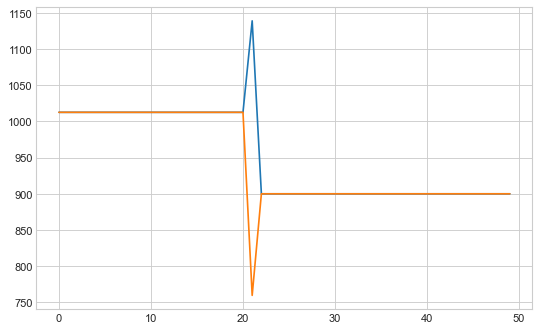

In [65]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(t_grid,profit_i_trig, profit_j_trig)

The graph shows that the profit before the trigger strategy is higher for both firms. When a trigger strategy is executed by firm i, it will get a higher profit (blue line) while firm j will be affected negatively by the trigger and get less profits exactly in period 21. From period 22 and onwards firm j punishes firm i by going directly to the nash equilibrium where firm i is forced to also be in nash equilibrium given that there is no incentive to deviate from the nash equilibrium. 

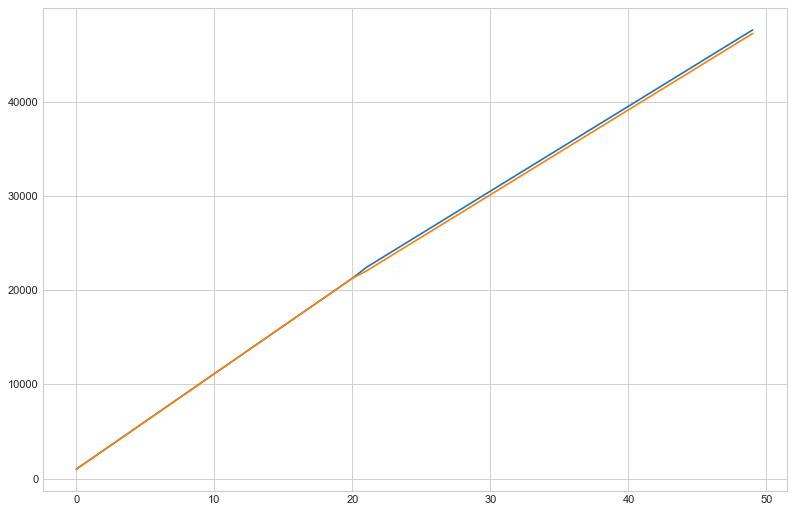

In [66]:
#Cumulating the profits for firm i and j when trigger strategy is executed
trig_i_cumulative = np.cumsum(profit_i_trig)
trig_j_cumulative = np.cumsum(profit_j_trig)

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(t_grid,trig_i_cumulative, trig_j_cumulative)

The figure above shows that firm i (blue line) gets a higher cumulative profit compared to firm j (orange line) when the firm executes the trigger strategy in period 21.

In the code below we loop over the profits in all 50 periods trying to find out when the optimum period to deviate is. This is done by finding the maximum profit given the period when deviation happens.

In [67]:
t_grid = np.linspace(0, 49, 50)
d_grid = np.linspace(0, 49, 50)

#Triggger
profit_i_trig_total = []
profit_j_trig_total = []

for j in d_grid:
    
    profit_i_trig = []
    profit_j_trig = []

    for i in t_grid:
        if i <= (j-1):
            profit_i_trig.append(optimum_profit)
            profit_j_trig.append(optimum_profit)
        elif i == j:
            profit_i_trig.append(opt_profit_deviate)
            profit_j_trig.append(profit(optimum_quantity,opt_quantity_deviate))
        else:
            profit_i_trig.append(profit(best_response_i[0],best_response_i[1]))
            profit_j_trig.append(profit(best_response_i[0],best_response_i[1]))
            
    profit_i_trig_total.append(sum(profit_i_trig))
    profit_j_trig_total.append(sum(profit_j_trig))

[(0.0, 50.0), (44000.0, 51000.0)]

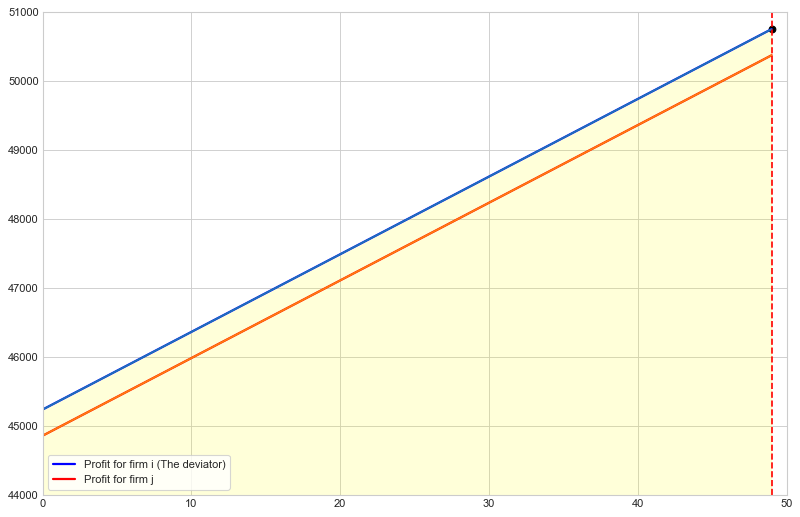

In [26]:
optimum_profit_trig = max(profit_i_trig_total)
optimum_deviationperiod_trig = d_grid[profit_i_trig_total.index(max(profit_i_trig_total))]

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(d_grid,profit_i_trig_total, lw=2,color='blue',label='Profit for firm i (The deviator)')
ax.plot(d_grid,profit_j_trig_total, lw=2, color='red',label='Profit for firm j')
ax.legend(loc='lower left',frameon=True)
ax.plot(d_grid,profit_i_trig_total, profit_j_trig_total)
ax.axvline(x=optimum_deviationperiod_trig, color='red',linestyle = 'dashed')
ax.scatter(optimum_deviationperiod_trig,optimum_profit_trig, color='black')
ax.fill_between(d_grid,profit_i_trig_total, color='yellow', alpha=0.15)
ax.set(xlim=(0, 50), ylim=(44000, 51000))



In [68]:
print(optimum_profit_trig, optimum_deviationperiod_trig)

50751.30353344937 49.0


The above profit is the total profit of deviating in period 49, which is the optimal period to deviate from the collution strategy.

### Tit For Tat strategy

The Tit For Tat strategy means that the one firm copies the other firms behaviour from the earlier period. This means in practice that they start at the Nash equilibrium and at some point one of the firms deviates from the strategy.

Below we have created a scenario where we collude in the first twenty periods and then at period 21 firm i deviates from the strategy. According to the tft-strategy the agents in the economy will copy the other agents behaviour in the previous period. This means that for all even periods firm j has the highest profit and in all odd periods firm i has the highest profit

In [69]:
t_grid = np.linspace(0, 49, 50)

#Triggger
profit_i_tft = []
profit_j_tft = []

for i in t_grid:
    if i <= 20:
        profit_i_tft.append(optimum_profit)
        profit_j_tft.append(optimum_profit)
    elif i == 21:
        profit_i_tft.append(opt_profit_deviate)
        profit_j_tft.append(profit(optimum_quantity,opt_quantity_deviate))
    elif (i%2 == 0):
        profit_i_tft.append(profit(optimum_quantity,opt_quantity_deviate))
        profit_j_tft.append(opt_profit_deviate)
    else:
        profit_i_tft.append(opt_profit_deviate)
        profit_j_tft.append(profit(optimum_quantity,opt_quantity_deviate))

We will now plot this using matplotlib

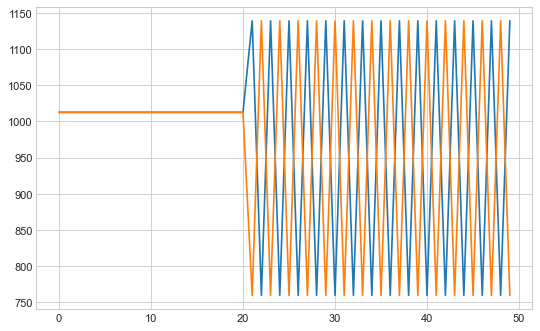

In [70]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(t_grid,profit_i_tft, profit_j_tft)

Now as in the trigger strategy we look at the cumulative profits of the two firms. This results in the following graphs:

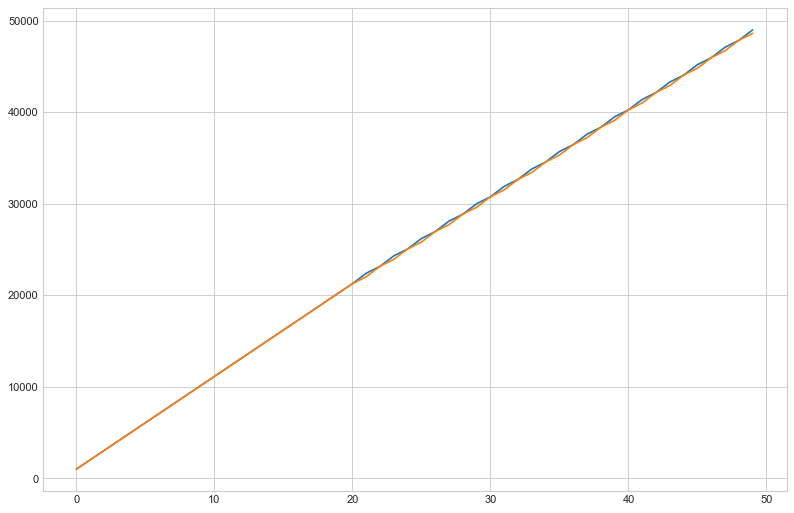

In [71]:
tft_i_cumulative = np.cumsum(profit_i_tft)
tft_j_cumulative = np.cumsum(profit_j_tft)

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(t_grid,tft_i_cumulative, tft_j_cumulative)

The graph above shows that when the deviation occurs from period 21 the profits split and join every second period. 

In the code below we loop over the profits in all 50 periods trying to find out when the optimum period to deviate is. This is done by finding the maximum profit given the period when deviation happens.

In [72]:
t_grid = np.linspace(0, 49, 50)
d_grid = np.linspace(0, 49, 50)

#Triggger
profit_i_tft_total = []
profit_j_tft_total = []

for j in d_grid:
    
    profit_i_tft = []
    profit_j_tft = []
    
    for i in t_grid:
        if i <= (j-1):
            profit_i_tft.append(optimum_profit)
            profit_j_tft.append(optimum_profit)
        elif i == j:
            profit_i_tft.append(opt_profit_deviate)
            profit_j_tft.append(profit(optimum_quantity,opt_quantity_deviate))
        elif (i%2 == 0):
            profit_i_tft.append(profit(optimum_quantity,opt_quantity_deviate))
            profit_j_tft.append(opt_profit_deviate)
        else:
            profit_i_tft.append(opt_profit_deviate)
            profit_j_tft.append(profit(optimum_quantity,opt_quantity_deviate))
            
    profit_i_tft_total.append(sum(profit_i_tft))
    profit_j_tft_total.append(sum(profit_j_tft))

We can now plot the results from the deviation from the tft-strategy

[(0.0, 50.0), (44000.0, 51000.0)]

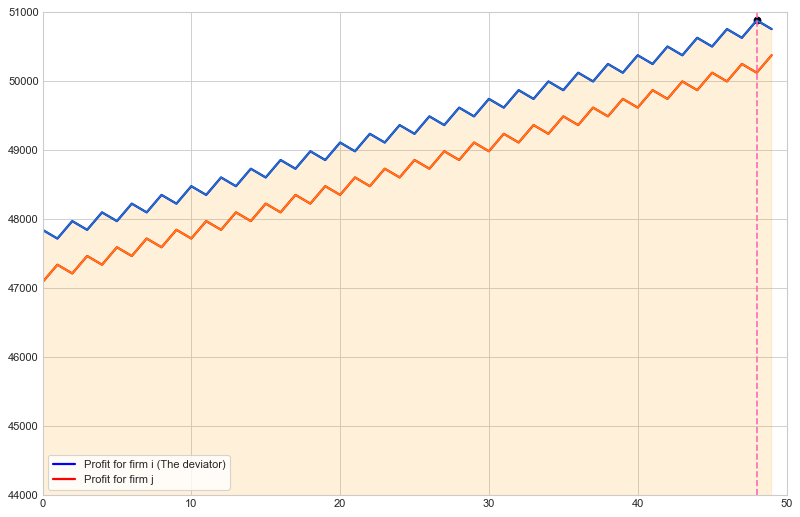

In [73]:
optimum_profit_tft = max(profit_i_tft_total)
optimum_deviationperiod_tft = d_grid[profit_i_tft_total.index(max(profit_i_tft_total))]

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(d_grid,profit_i_tft_total, lw=2,color='blue',label='Profit for firm i (The deviator)')
ax.plot(d_grid,profit_j_tft_total, lw=2, color='red',label='Profit for firm j')
ax.legend(loc='lower left',frameon=True)
ax.plot(d_grid,profit_i_tft_total, profit_j_tft_total)
ax.axvline(x=optimum_deviationperiod_tft, color='hotpink',linestyle = 'dashed')
ax.scatter(optimum_deviationperiod_tft,optimum_profit_tft, color='black')
ax.fill_between(d_grid,profit_i_tft_total, color='orange', alpha=0.15)
ax.set(xlim=(0, 50), ylim=(44000, 51000))

In [74]:
print('The maximum profit in tft-strategy', "%.2f" % optimum_profit_tft, 'with the following optimal period to deviate in ' "%.2f" % optimum_deviationperiod_tft)

The maximum profit in tft-strategy 50877.61 with the following optimal period to deviate in 48.00


The above graph shows us that in contrary to the trigger strategy the optimal time to deviate is the second to last period instead of the last period. Intutively this makes economic sense since profits are fluctuating over the period of time and that strategy is significantly different from trigger. In the following table below you can see the results for trigger and tft-strategy being compared.

### Summation

In [77]:
data = [["Trigger", optimum_profit_trig , optimum_deviationperiod_trig], 
        ["Tit For Tat", optimum_profit_tft, optimum_deviationperiod_tft]]
col_names = ["Strategy", "Profit", "Optimal deviation period"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════╤══════════╤════════════════════════════╕
│ Strategy    │   Profit │   Optimal deviation period │
╞═════════════╪══════════╪════════════════════════════╡
│ Trigger     │  50751.3 │                         49 │
├─────────────┼──────────┼────────────────────────────┤
│ Tit For Tat │  50877.6 │                         48 │
╘═════════════╧══════════╧════════════════════════════╛


Given that the players are playing the trigger strategy, the optimal behaviour is to deviate from the collusion strategy from the last period which is 49 which will get us the profit of 50,754.3 units. 

For the firms in a tft-stragy system, the optimal solution is to deviate from the collusion strategy in the second to last, which will be the 48th period. This will give us a profit of 50.885,1 units.